In [23]:
import pandas as pd
import re
import numpy as np

In [2]:


df_uk_school = pd.read_csv('/Users/Chai/Desktop/Projects/Data Science/Capstone/School_data.csv'
                           , encoding='utf-16', sep='\t', engine='python')

df_london_primary_school = df_uk_school[(df_uk_school['Region 9 name']=='London') & (df_uk_school['Phase']=='Primary')]

In [87]:
london_sw_clusters = pd.read_csv('/Users/Chai/Desktop/Projects/Data Science/Capstone/london_sw_clusters.csv')

In [27]:
uk_postocodes = pd.read_csv('/Users/Chai/Desktop/Projects/Data Science/Capstone/ukpostcodes.csv')


,id,postcode,latitude,longitude
0,1,AB10 1XG,57.144165,-2.114848
1,2,AB10 6RN,57.137880,-2.121487
2,3,AB10 7JB,57.124274,-2.127190
3,4,AB11 5QN,57.142701,-2.093295
4,5,AB11 6UL,57.137547,-2.112233
...,...,...,...,...
1758221,2649010,YO8 9SN,53.775330,-1.129099
1758222,2649011,YO8 9SP,53.767117,-1.089415
1758223,2649012,YO8 9TR,53.771989,-1.120702
1758224,2649013,ZE2 9FJ,60.128408,-1.208825


In [341]:
df_london_primary_school['Overall effectiveness'].unique()

array(['Good', 'Requires improvement', 'Outstanding', 'Inadequate'],
      dtype=object)

In [3]:
df_london_primary_school['As at date'] = pd.to_datetime(df_london_primary_school['As at date'])

/Users/Chai/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [4]:
df_london_primary_school['RN'] = df_london_primary_school.sort_values(by='As at date', ascending=False).groupby('Provider name').cumcount()

/Users/Chai/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [130]:
df_london_primary_school = df_london_primary_school[df_london_primary_school['RN']==0]

In [5]:
df_london_primary_school = df_london_primary_school[['As at date', 'Overall effectiveness','Constituency'
                                                     ,'Local authority area','Phase','Postcode'
                                                     ,'Provider name','Provider type'
                                                     ,'Provision type','URN']]

In [10]:
df_london_primary_school[df_london_primary_school['Provider name'].str.contains('Rutherford House')]

,As at date,Overall effectiveness,Constituency,Local authority area,Phase,Postcode,Provider name,Provider type,Provision type,URN
82201,2017-08-31,Good,Tooting,Wandsworth,Primary,SW17 7BS,Rutherford House School,Free school,Free School,139775
222977,2019-03-31,Good,Tooting,Wandsworth,Primary,SW17 7BS,Rutherford House School,Free school,Free School,139775
277216,2015-08-31,Good,Tooting,Wandsworth,Primary,SW17 7BS,Rutherford House School,Free school,Free School,139775
345739,2016-08-31,Good,Tooting,Wandsworth,Primary,SW17 7BS,Rutherford House School,Free school,Free School,139775
347394,2018-08-31,Good,Tooting,Wandsworth,Primary,SW17 7BS,Rutherford House School,Free school,Free School,139775


In [138]:
df_london_primary_school.shape

(1828, 10)

In [6]:
df_london_primary_school[df_london_primary_school['Postcode'].str.contains('U')]

,As at date,Overall effectiveness,Constituency,Local authority area,Phase,Postcode,Provider name,Provider type,Provision type,URN
21818,2017-08-31,Good,"Ruislip, Northwood and Pinner",Hillingdon,Primary,UB10 8JA,The Breakspear School,Local authority maintained,Community School,102369
21819,2017-08-31,Good,Kingston and Surbiton,Kingston upon Thames,Primary,KT5 9HU,Grand Avenue Primary and Nursery School,Local authority maintained,Community School,102580
21828,2017-08-31,Good,Twickenham,Richmond upon Thames,Primary,TW2 5TU,Archdeacon Cambridge's Church of England Prima...,Local authority maintained,Voluntary Aided School,102920
42633,2019-03-31,Requires improvement,Uxbridge and South Ruislip,Hillingdon,Primary,UB7 7QJ,St Matthew's CofE Primary School,Academy converter,Academy Converter,139302
42636,2019-03-31,Requires improvement,Hayes and Harlington,Hillingdon,Primary,UB3 1PG,Pinkwell Primary School,Academy sponsor led,Academy Sponsor Led,140671
...,...,...,...,...,...,...,...,...,...,...
390422,2019-03-31,Requires improvement,Ealing North,Ealing,Primary,UB5 4LB,Wood End Infant School,Local authority maintained,Foundation School,101936
390424,2019-03-31,Requires improvement,Uxbridge and South Ruislip,Hillingdon,Primary,UB8 2BX,St Andrew's CofE Primary School,Local authority maintained,Voluntary Aided School,102438
390476,2019-03-31,Requires improvement,Brent Central,Brent,Primary,NW10 3UD,Newfield Primary School,Local authority maintained,Community School,101522
390477,2019-03-31,Requires improvement,Brent Central,Brent,Primary,NW10 8UT,Harlesden Primary School,Local authority maintained,Community School,101499


In [15]:
df_london_primary_school

,As at date,Overall effectiveness,Constituency,Local authority area,Phase,Postcode,Provider name,Provider type,Provision type,URN,PostCodeLoc,PostCodeFirst
21811,2017-08-31,Good,Beckenham,Bromley,Primary,BR2 7LQ,Hayes Primary School,Academy converter,Academy Converter,136920,3,BR2
21812,2017-08-31,Good,Lewisham West and Penge,Bromley,Primary,BR3 4HJ,Balgowan Primary School,Academy converter,Academy Converter,137216,3,BR3
21813,2017-08-31,Good,Hornchurch and Upminster,Havering,Primary,RM14 3BS,Upminster Junior School,Academy converter,Academy Converter,138944,4,RM14
21814,2017-08-31,Good,Hendon,Barnet,Primary,NW7 4SL,Etz Chaim Jewish Primary School,Free school,Free School,136938,3,NW7
21815,2017-08-31,Good,Bromley and Chislehurst,Bromley,Primary,BR1 2SQ,Bickley Primary School,Local authority maintained,Community School,131553,3,BR1
...,...,...,...,...,...,...,...,...,...,...,...,...
390500,2019-03-31,Requires improvement,Vauxhall,Lambeth,Primary,SW9 6HN,Christ Church Primary SW9,Local authority maintained,Voluntary Aided School,100610,3,SW9
390501,2019-03-31,Requires improvement,Vauxhall,Lambeth,Primary,SW8 1EJ,St Stephen's Church of England Primary School,Local authority maintained,Voluntary Aided School,100621,3,SW8
390502,2019-03-31,Requires improvement,Bermondsey and Old Southwark,Southwark,Primary,SE17 1NQ,St John's Walworth Church of England Primary S...,Local authority maintained,Voluntary Aided School,100831,4,SE17
390503,2019-03-31,Requires improvement,Bethnal Green and Bow,Tower Hamlets,Primary,E3 4RB,Guardian Angels Catholic Primary School,Local authority maintained,Voluntary Aided School,100945,2,E3


In [12]:


df_london_primary_school['PostCodeLoc'] = df_london_primary_school['Postcode'].str.find(' ').fillna(0)
df_london_primary_school['PostCodeLoc'] = df_london_primary_school['PostCodeLoc'].apply(np.int64)
df_london_primary_school['PostCodeFirst'] = df_london_primary_school.apply(lambda x: x['Postcode'][:x['PostCodeLoc']], axis=1)

In [173]:

uk_postocodes[uk_postocodes['postcode'].str.contains('SW17 7B')]

,id,postcode,latitude,longitude
233256,250744,SW17 7BA,51.435913,-0.158672
233257,250745,SW17 7BB,51.436350,-0.166097
233258,250746,SW17 7BD,51.436793,-0.157619
233259,250747,SW17 7BE,51.437206,-0.157027
233260,250748,SW17 7BF,51.440690,-0.170470
233261,250749,SW17 7BG,51.437798,-0.156312
233262,250750,SW17 7BN,51.438316,-0.168162
233263,250751,SW17 7BP,51.438627,-0.168466
233264,250752,SW17 7BQ,51.439957,-0.154614
233265,250754,SW17 7BT,51.438783,-0.154935


In [28]:
df_london_sw_primary_school = df_london_primary_school[df_london_primary_school['PostCodeFirst'].str.contains('SW')]

In [34]:
df_london_sw_primary_school = df_london_sw_primary_school.merge(uk_postocodes, left_on='Postcode', right_on='postcode', how='left')[['As at date'
                                                                                                       ,'Overall effectiveness'
                                                                                                       ,'Constituency'
                                                                                                       ,'Local authority area'
                                                                                                       ,'Phase','Postcode'
                                                                                                       ,'Provider name'
                                                                                                       ,'Provider type'
                                                                                                       ,'Provision type'
                                                                                                       ,'Provision type'
                                                                                                       ,'URN'
                                                                                                       ,'PostCodeFirst'
                                                                                                       ,'latitude'
                                                                                                       ,'longitude']]

In [53]:
df_london_sw_primary_school.sort_values(by=['URN','As at date'],ascending=False)

,As at date,Overall effectiveness,Constituency,Local authority area,Phase,Postcode,Provider name,Provider type,Provision type,Provision type,URN,PostCodeFirst,latitude,longitude
51,2019-03-31,Inadequate,Tooting,Wandsworth,Primary,SW16 6DS,Goldfinch Primary School,Not inspected in current form,Academy Sponsor Led,Academy Sponsor Led,146549,SW16,51.421846,-0.141032
47,2019-03-31,Requires improvement,Mitcham and Morden,Merton,Primary,SW16 5HB,Stanford Primary School,Not inspected in current form,Academy Sponsor Led,Academy Sponsor Led,146401,SW16,51.409858,-0.135882
50,2019-03-31,Inadequate,Vauxhall,Lambeth,Primary,SW9 0RD,Van Gogh Academy,Academy converter,Academy Converter,Academy Converter,146368,SW9,51.474848,-0.115651
48,2019-03-31,Requires improvement,Battersea,Wandsworth,Primary,SW11 2AA,ARK John Archer Primary Academy,Academy converter,Academy Converter,Academy Converter,146214,SW11,51.461925,-0.173985
46,2019-03-31,Good,Tooting,Wandsworth,Primary,SW17 8HQ,Franciscan Primary School,Academy converter,Academy Converter,Academy Converter,146191,SW17,51.427574,-0.160852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,2015-08-31,Good,Chelsea and Fulham,Hammersmith and Fulham,Primary,SW6 6ND,Queen's Manor School and Special Needs Unit,Local authority maintained,Community School,Community School,100337,SW6,51.479842,-0.221771
442,2015-08-31,Requires improvement,Chelsea and Fulham,Hammersmith and Fulham,Primary,SW6 2LG,Langford Primary School,Local authority maintained,Community School,Community School,100332,SW6,51.472217,-0.188921
347,2015-08-31,Good,Chelsea and Fulham,Hammersmith and Fulham,Primary,SW6 4LY,New King's Primary School,Local authority maintained,Community School,Community School,100330,SW6,51.472122,-0.204203
541,2016-08-31,Good,Chelsea and Fulham,Hammersmith and Fulham,Primary,SW6 1JU,Fulham Primary School,Local authority maintained,Community School,Community School,100329,SW6,51.483534,-0.197979


In [54]:
df_london_sw_primary_school.sort_values(by=['URN','As at date'],ascending=False, inplace=True)

In [215]:
df_london_sw_primary_school_remove_duplicates = df_london_sw_primary_school.drop_duplicates(subset=['URN'], keep='last')

In [216]:
df_london_sw_primary_school_remove_duplicates[df_london_sw_primary_school_remove_duplicates['Provider name'].str.contains('Rutherford')]

,As at date,Overall effectiveness,Constituency,Local authority area,Phase,Postcode,Provider name,Provider type,URN,PostCodeFirst,latitude,longitude
277,2015-08-31,Good,Tooting,Wandsworth,Primary,SW17 7BS,Rutherford House School,Free school,139775,SW17,51.4393,-0.155356


In [194]:
df_london_sw_primary_school[df_london_sw_primary_school['Provider name'].str.contains('Rutherford')]

,As at date,Overall effectiveness,Constituency,Local authority area,Phase,Postcode,Provider name,Provider type,URN,PostCodeFirst,latitude,longitude
223,2019-03-31,Good,Tooting,Wandsworth,Primary,SW17 7BS,Rutherford House School,Free school,139775,SW17,51.4979,-0.155505
468,2018-08-31,Good,Tooting,Wandsworth,Primary,SW17 7BS,Rutherford House School,Free school,139775,SW17,51.4979,-0.155505
30,2017-08-31,Good,Tooting,Wandsworth,Primary,SW17 7BS,Rutherford House School,Free school,139775,SW17,51.4979,-0.155505
459,2016-08-31,Good,Tooting,Wandsworth,Primary,SW17 7BS,Rutherford House School,Free school,139775,SW17,51.4979,-0.155505
277,2015-08-31,Good,Tooting,Wandsworth,Primary,SW17 7BS,Rutherford House School,Free school,139775,SW17,51.4979,-0.155505


In [176]:
df_london_sw_primary_school

,As at date,Overall effectiveness,Constituency,Local authority area,Phase,Postcode,Provider name,Provider type,Provision type,Provision type,URN,PostCodeFirst,latitude,longitude
51,2019-03-31,Inadequate,Tooting,Wandsworth,Primary,SW16 6DS,Goldfinch Primary School,Not inspected in current form,Academy Sponsor Led,Academy Sponsor Led,146549,SW16,51.421846,-0.141032
47,2019-03-31,Requires improvement,Mitcham and Morden,Merton,Primary,SW16 5HB,Stanford Primary School,Not inspected in current form,Academy Sponsor Led,Academy Sponsor Led,146401,SW16,51.409858,-0.135882
50,2019-03-31,Inadequate,Vauxhall,Lambeth,Primary,SW9 0RD,Van Gogh Academy,Academy converter,Academy Converter,Academy Converter,146368,SW9,51.474848,-0.115651
48,2019-03-31,Requires improvement,Battersea,Wandsworth,Primary,SW11 2AA,ARK John Archer Primary Academy,Academy converter,Academy Converter,Academy Converter,146214,SW11,51.461925,-0.173985
46,2019-03-31,Good,Tooting,Wandsworth,Primary,SW17 8HQ,Franciscan Primary School,Academy converter,Academy Converter,Academy Converter,146191,SW17,51.427574,-0.160852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,2015-08-31,Good,Chelsea and Fulham,Hammersmith and Fulham,Primary,SW6 6ND,Queen's Manor School and Special Needs Unit,Local authority maintained,Community School,Community School,100337,SW6,51.479842,-0.221771
442,2015-08-31,Requires improvement,Chelsea and Fulham,Hammersmith and Fulham,Primary,SW6 2LG,Langford Primary School,Local authority maintained,Community School,Community School,100332,SW6,51.472217,-0.188921
347,2015-08-31,Good,Chelsea and Fulham,Hammersmith and Fulham,Primary,SW6 4LY,New King's Primary School,Local authority maintained,Community School,Community School,100330,SW6,51.472122,-0.204203
541,2016-08-31,Good,Chelsea and Fulham,Hammersmith and Fulham,Primary,SW6 1JU,Fulham Primary School,Local authority maintained,Community School,Community School,100329,SW6,51.483534,-0.197979


In [321]:
london_sw_neighourhood_zone = london_sw_clusters[['Neighbourhood','Zone']].sort_values(by='Neighbourhood').reset_index()

In [327]:
london_sw_neighourhood_zone.drop('index',1,inplace=True)

In [339]:
london_sw_neighourhood_zone.rename(columns={'Area':'Tube Station'}, inplace=True)

In [340]:
london_sw_neighourhood_zone

,Tube Station,Zone
0,Balham,3
1,Clapham South,2
2,East Putney,2
3,Fulham Broadway,2
4,Parsons Green,2
5,Southfields,3
6,Stockwell,2
7,Tooting Bec,3
8,Tooting Broadway,3
9,Wimbledon Park,3


In [181]:
df_london_sw_primary_school.drop(['Provision type'],1, inplace=True)

In [214]:
df_london_sw_primary_school.at[df_london_sw_primary_school['URN']=='139775','latitude'] = 51.439298
df_london_sw_primary_school.at[df_london_sw_primary_school['URN']=='139775','longitude'] = -0.155356



In [147]:
from math import sin, cos, sqrt, atan2, radians

school_coordinates = []

for urn in df_london_sw_primary_school_remove_duplicates['URN']:
    school_coordinates.append([urn
                               ,df_london_sw_primary_school_remove_duplicates[df_london_sw_primary_school_remove_duplicates['URN']==urn]['latitude'].map(radians)
                               ,df_london_sw_primary_school_remove_duplicates[df_london_sw_primary_school_remove_duplicates['URN']==urn]['longitude'].map(radians)])

In [217]:
df_london_sw_primary_school_remove_duplicates['lat_r'] = df_london_sw_primary_school_remove_duplicates['latitude'].apply(lambda x: radians(x))
df_london_sw_primary_school_remove_duplicates['lon_r'] = df_london_sw_primary_school_remove_duplicates['longitude'].apply(lambda x: radians(x))
london_sw_clusters['lat_r'] = london_sw_clusters['Latitude'].apply(lambda x: radians(x))
london_sw_clusters['lon_r'] = london_sw_clusters['Longitude'].apply(lambda x: radians(x))

/Users/Chai/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/Chai/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [127]:
def coord_distance(lat1, lon1, lat2, lon2):
    R = 6373.0
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return str(R * c)


In [184]:
lat1 = london_sw_clusters[london_sw_clusters['Neighbourhood']=='Balham']['lat_r'].values
lon1 = london_sw_clusters[london_sw_clusters['Neighbourhood']=='Balham']['lon_r'].values

In [203]:
df_school[df_school['URN']=='146191']

,As at date,Overall effectiveness,Constituency,Local authority area,Phase,Postcode,Provider name,Provider type,URN,PostCodeFirst,latitude,longitude,lat_r,lon_r
46,2019-03-31,Good,Tooting,Wandsworth,Primary,SW17 8HQ,Franciscan Primary School,Academy converter,146191,SW17,51.4276,-0.160852,0.89758,-0.002807


In [227]:
df_school = df_london_sw_primary_school_remove_duplicates
df_tube_school_dis = []


for tube in london_sw_clusters['Neighbourhood']:
    london_sw_subset = london_sw_clusters[london_sw_clusters['Neighbourhood']==tube]
    lat1 = london_sw_subset['lat_r'].values
    lon1 = london_sw_subset['lon_r'].values
    for urn in df_school['URN']:
        lat2 = df_school[df_school['URN']==urn]['lat_r'].values
        lon2 = df_school[df_school['URN']==urn]['lon_r'].values
    #     print(lat1,lon1,urn,lat2,lon2)
        df_tube_school_dis.append([tube, urn, coord_distance(lat1, lon1, lat2, lon2)])
  
df_tube_school_dis = pd.DataFrame(df_tube_school_dis, columns=['Neighbourhood','URN','Distance'])


In [228]:
df_tube_school_dis

,Neighbourhood,URN,Distance
0,Wimbledon Park,146549,4.214526312328401
1,Wimbledon Park,146401,5.109355209864272
2,Wimbledon Park,146368,7.336289499167045
3,Wimbledon Park,146214,3.5540331884483294
4,Wimbledon Park,146191,2.7136115949250286
...,...,...,...
1805,Balham,100338,5.900611872577113
1806,Balham,100337,6.256380760529959
1807,Balham,100332,4.05724172181651
1808,Balham,100330,4.77460861597198


In [207]:
london_sw_clusters[london_sw_clusters['Neighbourhood']=='Balham']

,Unnamed: 0,Zone,Latitude,Longitude,Cluster Labels,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,lat_r,lon_r
9,0,3,51.443441,-0.152946,3,Balham,Coffee Shop,Pub,Pizza Place,Bakery,Indian Restaurant,Café,Bar,Sandwich Place,Italian Restaurant,Supermarket,0.897857,-0.002669


In [232]:
len(df_school['URN'].unique())

181

In [235]:
df_tube_school = df_tube_school_dis.merge(df_school, left_on='URN', right_on='URN').sort_values(by=['Neighbourhood'])

In [250]:
df_tube_school_summary = df_tube_school[df_tube_school['Distance'].astype(float) <= 1].groupby(['Neighbourhood','Phase'
                                                                       ,'Overall effectiveness'])['URN']\
                                                            .count().reset_index()

In [259]:
df_tube_school_summary['Rating'] = df_tube_school_summary['Overall effectiveness'].apply(lambda x: 2 if x == 'Outstanding' else (1 if x == 'Good' else 0))

In [270]:
df_tube_school_summary['Total Rating'] = df_tube_school_summary['URN'] * df_tube_school_summary['Rating']

In [292]:
def divide_two_cols(df):
    return df['Total Rating'].sum() / float(df['URN'].sum())

df_tube_school_rating = df_tube_school_summary.groupby(['Neighbourhood'])['URN','Total Rating'] \
                                                .sum().reset_index().sort_values(by='Total Rating', ascending=False)


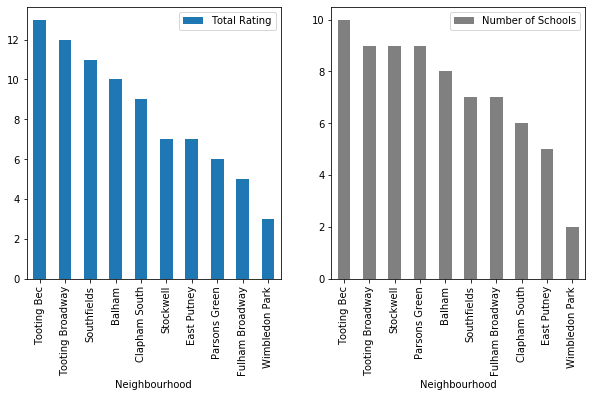

In [343]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))

df_tube_school_rating.sort_values(by='Total Rating',ascending=False, inplace=True)
df_tube_school_rating.plot(x='Neighbourhood', y='Total Rating',ax=ax1,kind='bar', label='Total Rating')

df_tube_school_rating.sort_values(by='URN',ascending=False, inplace=True)
df_tube_school_rating.plot(x='Neighbourhood', y='URN',ax=ax2, kind='bar',label='Number of Schools',color='grey')

In [240]:
df_tube_school[df_tube_school['Neighbourhood']=='Balham'].sort_values(by='Distance').head(20)

,Neighbourhood,URN,Distance,As at date,Overall effectiveness,Constituency,Local authority area,Phase,Postcode,Provider name,Provider type,PostCodeFirst,latitude,longitude,lat_r,lon_r
1079,Balham,101017,0.19602702149863888,2015-08-31,Requires improvement,Tooting,Wandsworth,Primary,SW12 9SS,Ravenstone Primary School,Local authority maintained,SW12,51.4417,-0.152659,0.897827,-0.002664
819,Balham,101047,0.19671797862555065,2015-08-31,Good,Tooting,Wandsworth,Primary,SW12 8DR,Trinity St Mary's CofE Primary School,Local authority maintained,SW12,51.4425,-0.155388,0.897842,-0.002712
229,Balham,139775,0.4901992470614393,2015-08-31,Good,Tooting,Wandsworth,Primary,SW17 7BS,Rutherford House School,Free school,SW17,51.4393,-0.155356,0.897785,-0.002711
909,Balham,101036,0.5472029597935025,2015-08-31,Outstanding,Tooting,Wandsworth,Primary,SW12 8QJ,Holy Ghost Catholic Primary School,Local authority maintained,SW12,51.4479,-0.156352,0.897935,-0.002729
1259,Balham,100995,0.6149290194357012,2015-08-31,Good,Battersea,Wandsworth,Primary,SW12 8PP,Alderbrook Primary School,Local authority maintained,SW12,51.4486,-0.149864,0.897948,-0.002616
1559,Balham,100567,0.7175888539251266,2015-08-31,Outstanding,Streatham,Lambeth,Primary,SW12 0JA,Henry Cavendish Primary School,Local authority maintained,SW12,51.4447,-0.142808,0.897880,-0.002492
1319,Balham,100628,0.7535750034534993,2015-08-31,Good,Streatham,Lambeth,Primary,SW12 0AB,St Bernadette Catholic Junior School,Local authority maintained,SW12,51.4479,-0.14478,0.897935,-0.002527
769,Balham,101052,0.9314214335851877,2015-08-31,Outstanding,Tooting,Wandsworth,Primary,SW17 8BS,St Anselm's Catholic Primary School,Local authority maintained,SW17,51.4357,-0.15805,0.897722,-0.002758
1499,Balham,100586,1.0553195195038294,2015-08-31,Outstanding,Streatham,Lambeth,Primary,SW12 0HW,Telferscot Primary School,Local authority maintained,SW12,51.4427,-0.137767,0.897845,-0.002404
1169,Balham,101007,1.0715020933593915,2015-08-31,Good,Tooting,Wandsworth,Primary,SW17 7PP,Fircroft Primary School,Local authority maintained,SW17,51.4369,-0.164263,0.897743,-0.002867


In [237]:
df_tube_school[df_tube_school['Provider name'].str.contains('Rutherford')]

,Neighbourhood,URN,Distance,As at date,Overall effectiveness,Constituency,Local authority area,Phase,Postcode,Provider name,Provider type,PostCodeFirst,latitude,longitude,lat_r,lon_r
229,Balham,139775,0.4901992470614393,2015-08-31,Good,Tooting,Wandsworth,Primary,SW17 7BS,Rutherford House School,Free school,SW17,51.4393,-0.155356,0.897785,-0.002711
223,Clapham South,139775,1.6088941661820022,2015-08-31,Good,Tooting,Wandsworth,Primary,SW17 7BS,Rutherford House School,Free school,SW17,51.4393,-0.155356,0.897785,-0.002711
222,East Putney,139775,4.445415928803821,2015-08-31,Good,Tooting,Wandsworth,Primary,SW17 7BS,Rutherford House School,Free school,SW17,51.4393,-0.155356,0.897785,-0.002711
221,Fulham Broadway,139775,5.322859054339415,2015-08-31,Good,Tooting,Wandsworth,Primary,SW17 7BS,Rutherford House School,Free school,SW17,51.4393,-0.155356,0.897785,-0.002711
228,Parsons Green,139775,5.1124612026143526,2015-08-31,Good,Tooting,Wandsworth,Primary,SW17 7BS,Rutherford House School,Free school,SW17,51.4393,-0.155356,0.897785,-0.002711
224,Southfields,139775,3.598623118884623,2015-08-31,Good,Tooting,Wandsworth,Primary,SW17 7BS,Rutherford House School,Free school,SW17,51.4393,-0.155356,0.897785,-0.002711
225,Stockwell,139775,4.306820341952046,2015-08-31,Good,Tooting,Wandsworth,Primary,SW17 7BS,Rutherford House School,Free school,SW17,51.4393,-0.155356,0.897785,-0.002711
226,Tooting Bec,139775,0.49023679557413796,2015-08-31,Good,Tooting,Wandsworth,Primary,SW17 7BS,Rutherford House School,Free school,SW17,51.4393,-0.155356,0.897785,-0.002711
227,Tooting Broadway,139775,1.5471074736098955,2015-08-31,Good,Tooting,Wandsworth,Primary,SW17 7BS,Rutherford House School,Free school,SW17,51.4393,-0.155356,0.897785,-0.002711
220,Wimbledon Park,139775,3.0604980736393452,2015-08-31,Good,Tooting,Wandsworth,Primary,SW17 7BS,Rutherford House School,Free school,SW17,51.4393,-0.155356,0.897785,-0.002711


In [223]:
df_tube_school.head(30)

,0,1,As at date,Overall effectiveness,Constituency,Local authority area,Phase,Postcode,Provider name,Provider type,URN,PostCodeFirst,latitude,longitude,lat_r,lon_r
107,101017,0.19602702149863888,2015-08-31,Requires improvement,Tooting,Wandsworth,Primary,SW12 9SS,Ravenstone Primary School,Local authority maintained,101017,SW12,51.4417,-0.152659,0.897827,-0.002664
81,101047,0.19671797862555065,2015-08-31,Good,Tooting,Wandsworth,Primary,SW12 8DR,Trinity St Mary's CofE Primary School,Local authority maintained,101047,SW12,51.4425,-0.155388,0.897842,-0.002712
22,139775,0.4901992470614393,2015-08-31,Good,Tooting,Wandsworth,Primary,SW17 7BS,Rutherford House School,Free school,139775,SW17,51.4393,-0.155356,0.897785,-0.002711
90,101036,0.5472029597935025,2015-08-31,Outstanding,Tooting,Wandsworth,Primary,SW12 8QJ,Holy Ghost Catholic Primary School,Local authority maintained,101036,SW12,51.4479,-0.156352,0.897935,-0.002729
125,100995,0.6149290194357012,2015-08-31,Good,Battersea,Wandsworth,Primary,SW12 8PP,Alderbrook Primary School,Local authority maintained,100995,SW12,51.4486,-0.149864,0.897948,-0.002616
155,100567,0.7175888539251266,2015-08-31,Outstanding,Streatham,Lambeth,Primary,SW12 0JA,Henry Cavendish Primary School,Local authority maintained,100567,SW12,51.4447,-0.142808,0.897880,-0.002492
131,100628,0.7535750034534993,2015-08-31,Good,Streatham,Lambeth,Primary,SW12 0AB,St Bernadette Catholic Junior School,Local authority maintained,100628,SW12,51.4479,-0.14478,0.897935,-0.002527
76,101052,0.9314214335851877,2015-08-31,Outstanding,Tooting,Wandsworth,Primary,SW17 8BS,St Anselm's Catholic Primary School,Local authority maintained,101052,SW17,51.4357,-0.15805,0.897722,-0.002758
149,100586,1.0553195195038294,2015-08-31,Outstanding,Streatham,Lambeth,Primary,SW12 0HW,Telferscot Primary School,Local authority maintained,100586,SW12,51.4427,-0.137767,0.897845,-0.002404
116,101007,1.0715020933593915,2015-08-31,Good,Tooting,Wandsworth,Primary,SW17 7PP,Fircroft Primary School,Local authority maintained,101007,SW17,51.4369,-0.164263,0.897743,-0.002867


In [88]:
london_sw_clusters

,Unnamed: 0,Zone,Latitude,Longitude,Cluster Labels,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,27,3,51.433910,-0.198640,2,Wimbledon Park,Grocery Store,Café,Coffee Shop,Playground,Sports Club,Golf Course,Tennis Court,Chinese Restaurant,Metro Station,Farmers Market
1,7,2,51.480330,-0.194880,3,Fulham Broadway,Coffee Shop,Pub,Café,Soccer Stadium,Pizza Place,Grocery Store,Restaurant,Climbing Gym,Gastropub,French Restaurant
2,6,2,51.459015,-0.211138,3,East Putney,Coffee Shop,Bar,Clothing Store,Café,Grocery Store,Bakery,Sandwich Place,Gym / Fitness Center,Hotel,Italian Restaurant
3,4,2,51.452923,-0.147562,3,Clapham South,Grocery Store,Pub,Pizza Place,Indian Restaurant,Restaurant,Breakfast Spot,Bakery,Italian Restaurant,Gastropub,Supermarket
4,17,3,51.444941,-0.206466,3,Southfields,Coffee Shop,Pub,Grocery Store,Lebanese Restaurant,Gym Pool,Park,Pizza Place,Bakery,Rental Car Location,Gym
5,19,2,51.472240,-0.122700,3,Stockwell,Portuguese Restaurant,Pub,Grocery Store,Park,Supermarket,Coffee Shop,Platform,Peruvian Restaurant,Indian Restaurant,Convenience Store
6,20,3,51.435790,-0.159636,3,Tooting Bec,Coffee Shop,Café,Indian Restaurant,Convenience Store,Pub,Supermarket,Bus Stop,Grocery Store,Bakery,Cosmetics Shop
7,21,3,51.427800,-0.167911,3,Tooting Broadway,Indian Restaurant,Pub,Coffee Shop,Bar,Cosmetics Shop,Cocktail Bar,Pizza Place,South Indian Restaurant,Fish & Chips Shop,Clothing Store
8,12,2,51.474880,-0.202050,3,Parsons Green,Coffee Shop,Italian Restaurant,Café,Pub,Park,Bakery,Climbing Gym,French Restaurant,Pizza Place,Juice Bar
9,0,3,51.443441,-0.152946,3,Balham,Coffee Shop,Pub,Pizza Place,Bakery,Indian Restaurant,Café,Bar,Sandwich Place,Italian Restaurant,Supermarket
